In [67]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [68]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [69]:
NUM_CLASSES = 9

# 学習データ読み込み

In [70]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [71]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [74]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 42)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                860       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 9)                 99        
                                                                 
Total params: 1169 (4.57 KB)
Trainable params: 1169 (4.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [76]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [77]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
40/46 [=========================>....] - ETA: 0s - loss: 2.1901 - accuracy: 0.1307
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 2s 16ms/step - loss: 2.1715 - accuracy: 0.1381 - val_loss: 2.0090 - val_accuracy: 0.2038
Epoch 2/1000
31/46 [===================>..........] - ETA: 0s - loss: 1.9957 - accuracy: 0.2137

C:\Users\padol\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 8ms/step - loss: 1.9717 - accuracy: 0.2247 - val_loss: 1.8162 - val_accuracy: 0.2792
Epoch 3/1000
37/46 [=======================>......] - ETA: 0s - loss: 1.8467 - accuracy: 0.2789
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 6ms/step - loss: 1.8321 - accuracy: 0.2826 - val_loss: 1.6486 - val_accuracy: 0.3479
Epoch 4/1000
34/46 [=====================>........] - ETA: 0s - loss: 1.7228 - accuracy: 0.3127
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 7ms/step - loss: 1.7068 - accuracy: 0.3208 - val_loss: 1.5017 - val_accuracy: 0.3882
Epoch 5/1000
32/46 [===================>..........] - ETA: 0s - loss: 1.6287 - accuracy: 0.3589
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [=============

In [78]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

16/16 [==============================] - 0s 1ms/step - loss: 0.4679 - accuracy: 0.8966


In [79]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [80]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 50ms/step
[7.6416956e-07 2.8345929e-04 4.7597769e-08 6.8159401e-04 4.9234244e-05
 4.8699062e-06 1.0722687e-06 4.4861650e-01 5.5036247e-01]
8


# 混同行列

62/62 [==============================] - 0s 1ms/step


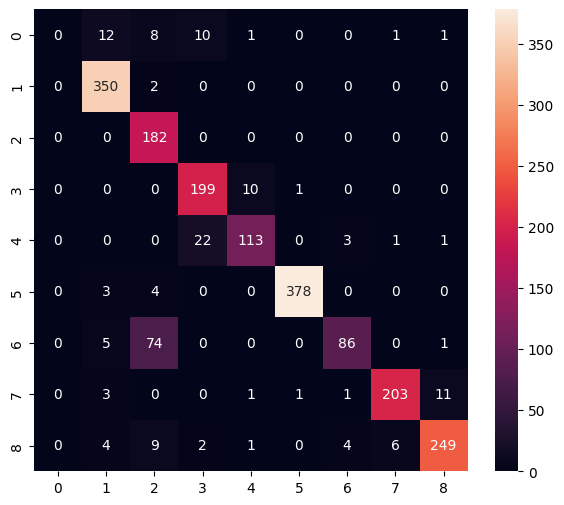

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.93      0.99      0.96       352
           2       0.65      1.00      0.79       182
           3       0.85      0.95      0.90       210
           4       0.90      0.81      0.85       140
           5       0.99      0.98      0.99       385
           6       0.91      0.52      0.66       166
           7       0.96      0.92      0.94       220
           8       0.95      0.91      0.93       275

    accuracy                           0.90      1963
   macro avg       0.79      0.79      0.78      1963
weighted avg       0.90      0.90      0.89      1963



C:\Users\padol\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\padol\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\padol\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [82]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

C:\Users\padol\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [83]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\padol\AppData\Local\Temp\tmp_pnqdy_i\assets


INFO:tensorflow:Assets written to: C:\Users\padol\AppData\Local\Temp\tmp_pnqdy_i\assets


6816

# 推論テスト

In [84]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [85]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [86]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [87]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [88]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.6417035e-07 2.8345943e-04 4.7597858e-08 6.8159337e-04 4.9234244e-05
 4.8699053e-06 1.0722707e-06 4.4861650e-01 5.5036247e-01]
8
